In [55]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [56]:
#Loading the dataset
df = pd.read_csv('Automobile_insurance_fraud.csv')
pd.set_option ('max_columns', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [57]:
df.shape

(1000, 40)

In this dataset 1000 rows and 41 columns.

In [58]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [59]:
#Checking the data types of all the columns
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

some are object some are float.

In [60]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


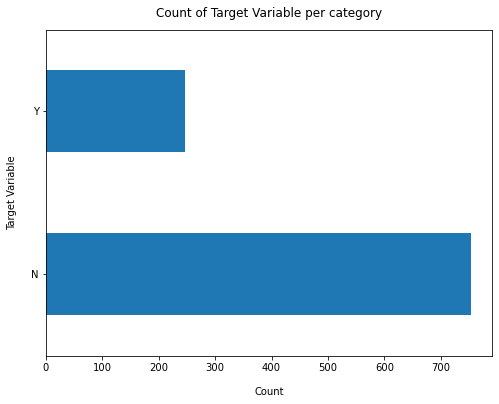

In [61]:
df['fraud_reported'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target Variable',labelpad=14)
plt.title('Count of Target Variable per category',y=1.02);

In [62]:
100*df['fraud_reported'].value_counts()/len(df['fraud_reported'])

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

Data is highly imbalanced,ratio = 73:24,So we analyse the data with other features while talking the target values separately to get some insights.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [64]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

No missing values in this dataset except _c39._c39 has all NaN value so we will drop it

In [65]:
df = df.drop(['_c39','insured_education_level','insured_occupation','insured_hobbies','insured_relationship'],axis=1)

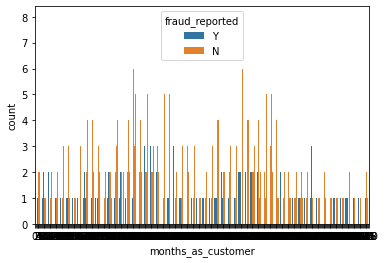

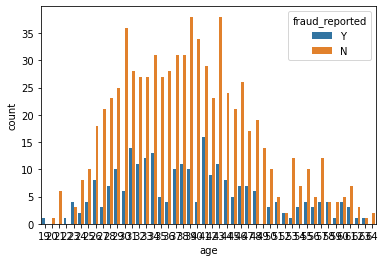

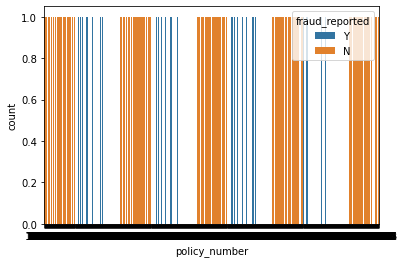

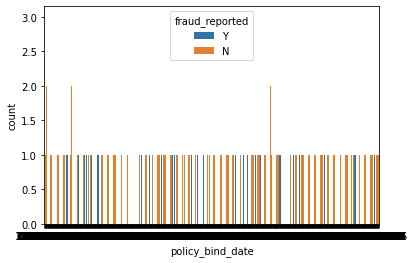

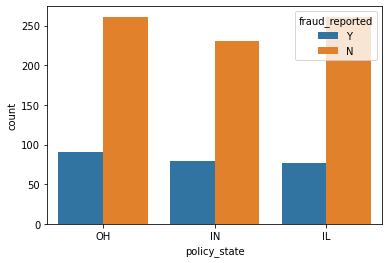

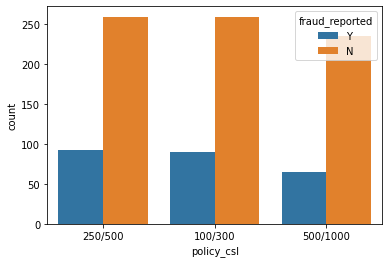

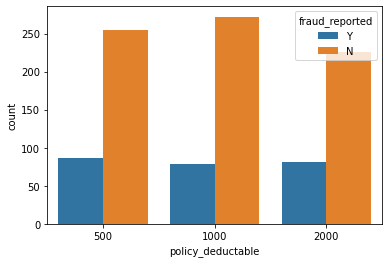

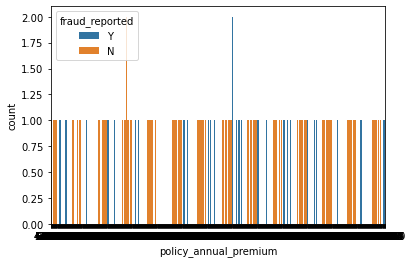

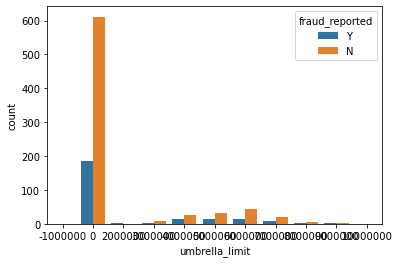

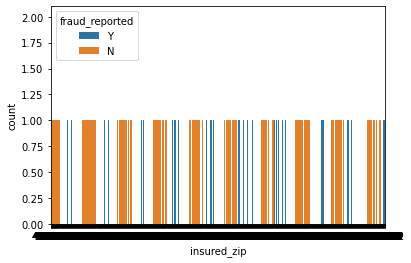

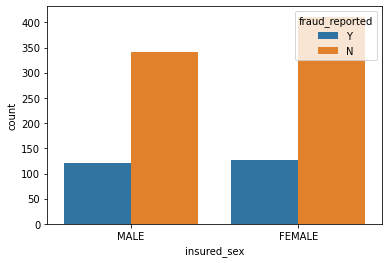

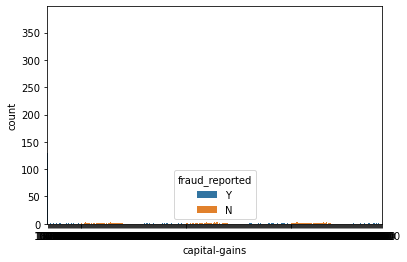

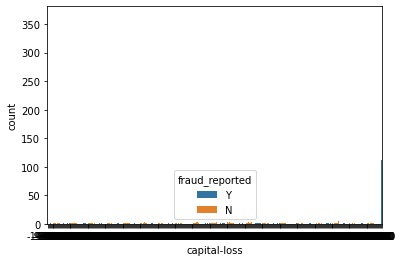

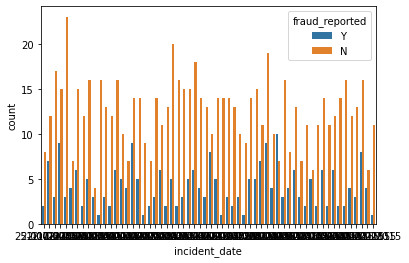

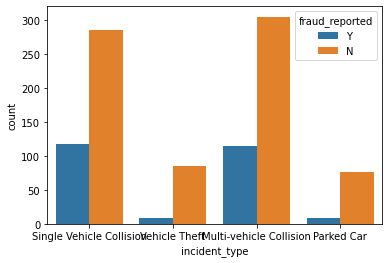

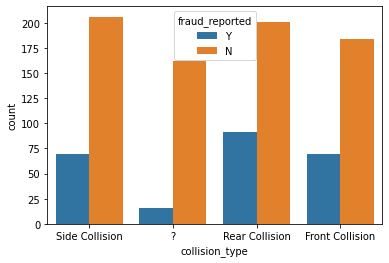

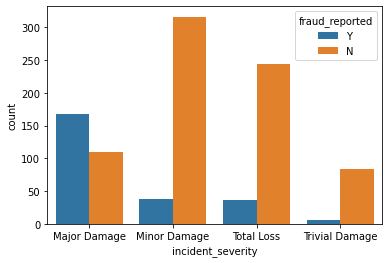

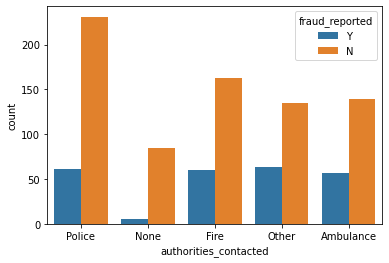

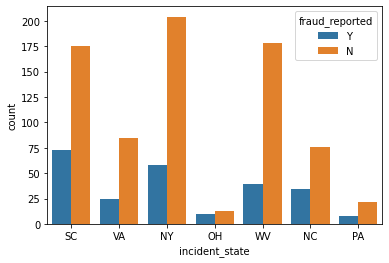

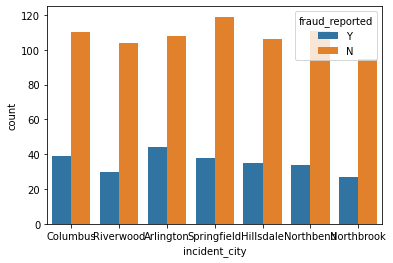

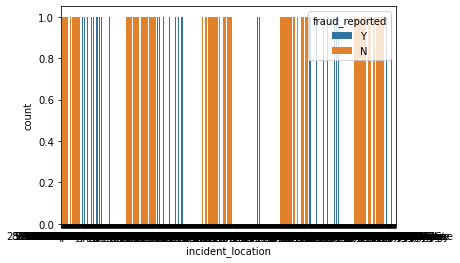

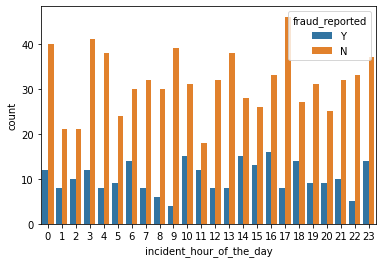

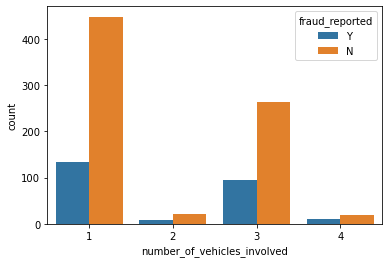

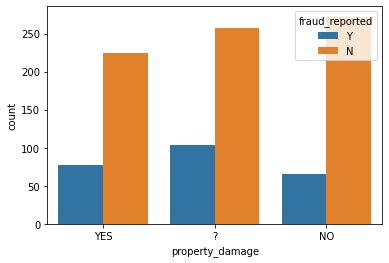

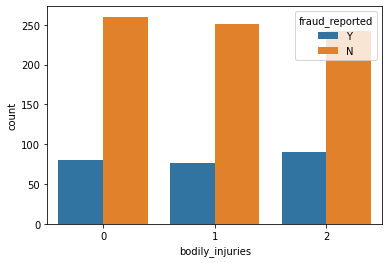

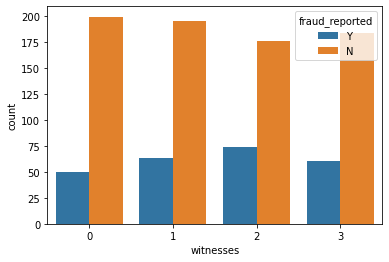

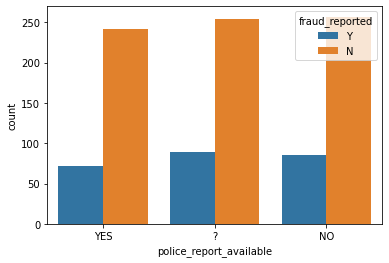

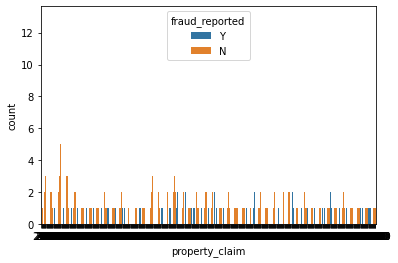

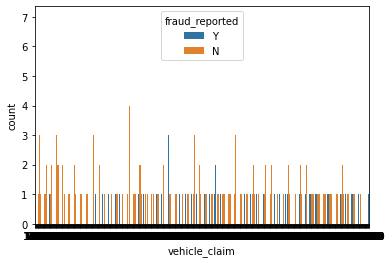

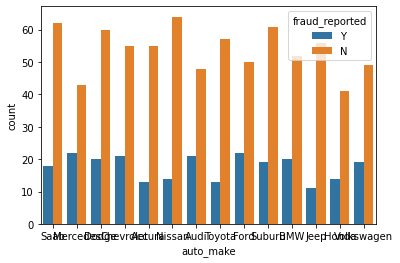

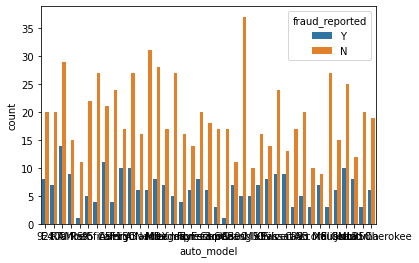

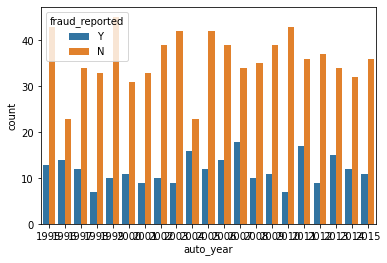

In [66]:
for i, predictor in enumerate(df.drop(columns=['fraud_reported','total_claim_amount','injury_claim'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='fraud_reported')

Convert the target variable 'fraud_reported' in a binary numeric variable yes=1,no=0

In [67]:
df['fraud_reported'] =np.where(df.fraud_reported=='Yes',1,0)

In [68]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,0
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,0
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,0
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [73]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['incident_date'] = encoder.fit_transform(df['incident_date'])
df['incident_type'] = encoder.fit_transform(df['incident_type'])
df['collision_type'] = encoder.fit_transform(df['collision_type'])
df['incident_severity'] = encoder.fit_transform(df['incident_severity'])
df['authorities_contacted'] = encoder.fit_transform(df['authorities_contacted'])
df['incident_state'] = encoder.fit_transform(df['incident_state'])
df['incident_city'] = encoder.fit_transform(df['incident_city'])
df['incident_location'] = encoder.fit_transform(df['incident_location'])
df['property_damage'] = encoder.fit_transform(df['property_damage'])
df['police_report_available'] = encoder.fit_transform(df['police_report_available'])
df['auto_make'] = encoder.fit_transform(df['auto_make'])
df['auto_model'] = encoder.fit_transform(df['auto_model'])

In [74]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries                  int64
witnesses                

In [76]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,1,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,0
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,1,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,0
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,0,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,0,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,0
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,1,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0


In [78]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,0.006399,0.020209,-0.002985,-0.017377,-0.017824,-0.059581,0.010021,0.005369,-0.000130,-0.013630,0.070639,0.014736,0.007040,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,-0.007075,0.007368,0.002416,-0.025626,-0.018672,-0.058439,0.015417,0.005770,-0.002291,-0.011101,0.087161,0.022102,-0.001486,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,0.009802,-0.005669,0.053022,0.001742,-0.013402,-0.015719,0.018565,-0.010064,-0.035406,0.016393,0.000113,0.013432,0.005575,-0.004558,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,NaN
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,0.039338,-0.004535,-0.026123,0.008022,0.000164,0.004271,-0.055760,-0.032065,0.043035,0.034437,-0.001244,-0.012582,-0.002381,-0.011615,-0.046970,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,NaN
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,0.074551,-0.030338,0.027287,0.031848,0.034739,-0.026377,-0.016777,0.008723,-0.002077,0.029534,0.029457,-0.042263,0.008623,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,NaN
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.005249,-0.034612,-0.010140,0.011997,-0.036687,0.022530,0.056182,0.032814,0.009333,0.047704,-0.001869,-0.019403,-0.027340,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,NaN
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.035212,-0.023544,-0.024055,-0.038411,-0.033182,-0.015711,-0.000760,0.006517,-0.045117,-0.009281,0.060935,0.051214,0.016900,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.013738,0.023547,0.028257,0.053603,0.036719,-0.011155,-0.055191,0.046434,0.048724,0.017883,-0.001578,-0.045991,0.095359,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.047268,-0.024056,-0.009471,0.015966,-0.025913,0.009466,0.029044,-0.077492,0.013094,0.014510,-0.023257,-0.021270,-0.056957,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.006303,0.049372,0.027113,-0.010840,-0.045313,-0.023855,-0.017548,-0.047669,-0.017532,-0.013847,0.008274,0.027448,0.060342,0.028695,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,NaN


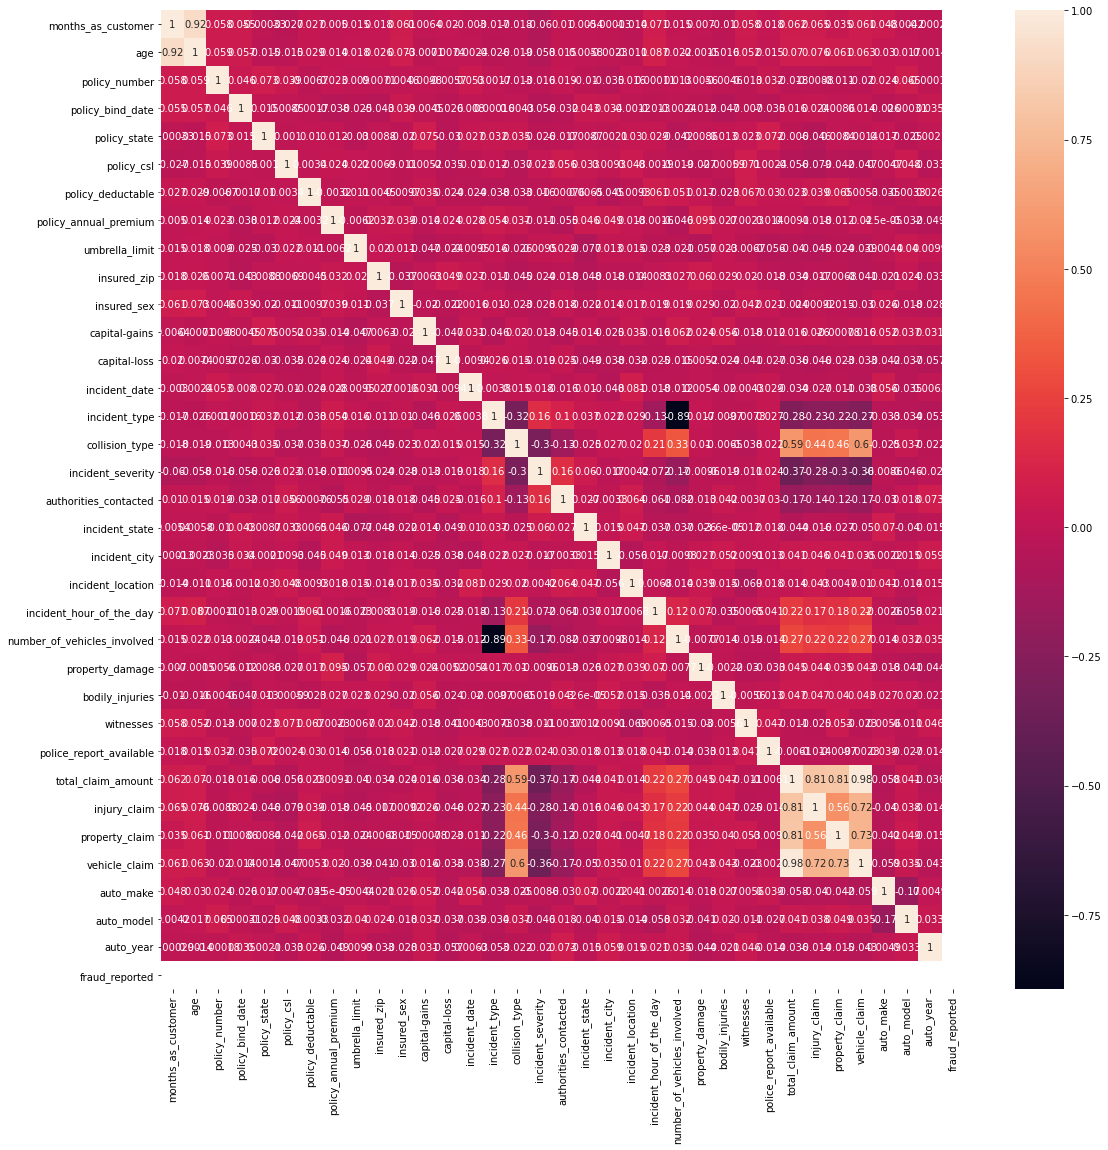

In [81]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True);

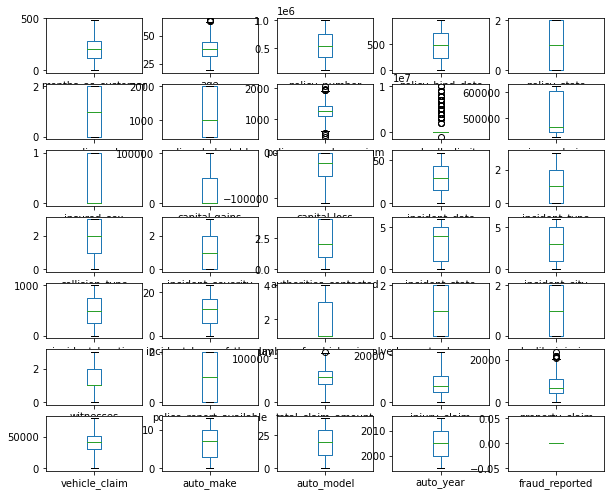

In [93]:
df.plot(kind='box',figsize=(10,12),layout=(10,5),sharex=False,subplots=True);

In [99]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

In [101]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_transform = scalar.fit_transform(x)

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size=0.3,random_state=40)

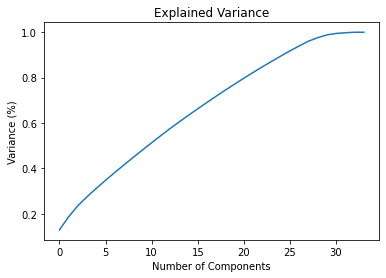

In [104]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')   #for each component
plt.title('Explained Variance')
plt.show()

We can see that 95% of the variance is being explained by 25 componenrs.

In [153]:
pca = PCA(n_components=20)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20'])

In [154]:
principal_x.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20
0,-1.093535,1.611276,1.638864,-2.959350,0.246805,0.732763,0.513826,-0.059969,-0.920985,-0.431903,0.122444,0.276984,0.151913,0.268471,-1.497982,1.601992,0.561013,1.362071,0.191241,0.354150
1,4.015203,0.910529,0.326213,0.664414,-0.278826,-1.168565,1.495245,-0.350797,-0.076695,-1.186628,-0.228380,1.010017,-1.017060,-0.582339,0.488465,0.405259,1.966399,0.691836,1.425275,-0.383650
2,0.472021,-1.261440,-1.746633,0.429038,-0.413111,1.958667,-0.901714,0.135500,-1.279580,0.632902,0.300147,1.040247,0.146591,0.329322,-0.860262,-0.462706,2.342606,0.945878,-0.293427,1.475184
3,0.192607,0.572449,0.552471,2.279656,-1.815533,1.278294,-0.304978,0.059243,-0.650299,0.747544,-0.485703,0.616244,-2.431810,-0.572814,-0.588034,-0.365590,1.020555,0.460744,1.403153,-0.916447
4,3.475647,0.908390,0.031526,1.768350,0.838972,1.576716,-1.504953,-0.233362,-0.028098,-0.730583,-0.302461,1.249692,-1.816735,0.462705,0.256149,-1.440897,-1.413871,1.431706,0.115970,-0.872811


In [155]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.3,random_state=40)

In [156]:
x_train.shape

(700, 20)

In [157]:
y_train.shape

(700,)

In [158]:
x_test.shape

(300, 20)

In [159]:
y_test.shape

(300,)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Random Forest Classifier

In [161]:
rfc = RandomForestClassifier()

model1 = rfc.fit(x_train,y_train)
prediction1 = model1.predict(x_test)

print('Acc on training data:{:,.3f}'.format(rfc.score(x_train,y_train)))
print('Acc on test data:{:,.3f}'.format(rfc.score(x_test,y_test)))

Acc on training data:1.000
Acc on test data:1.000


# Decision Tree Classifier

In [162]:
dtc = DecisionTreeClassifier()
model2= dtc.fit(x_train,y_train)
prediction2 = model2.predict(x_test)

print('Acc on training data:{:,.3f}'.format(dtc.score(x_train,y_train)))
print('Acc on test data:{:,.3f}'.format(dtc.score(x_test,y_test)))

Acc on training data:1.000
Acc on test data:1.000


# KNeighbors classifier

In [163]:
knn = KNeighborsClassifier()
model3 =knn.fit(x_train,y_train)
prediction3 = model3.predict(x_test)

print('Acc on training data:{:,.3f}'.format(knn.score(x_train,y_train)))
print('Acc on test data:{:,.3f}'.format(knn.score(x_test,y_test)))

Acc on training data:1.000
Acc on test data:1.000


In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
#Cross val score of dtc
print(cross_val_score(dtc,x,y,cv=5).mean())

1.0


In [166]:
#cross val score of rfc
print(cross_val_score(rfc,x,y,cv=5).mean())

1.0


In [167]:
#cross val score of knn
print(cross_val_score(knn,x,y,cv=5).mean())

1.0


all model is giving 100% accuracy. we will find best for Random Forest.

In [168]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Hyper parameter tuning

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
#finding best parameter for rfc
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy'],
           'max_leaf_nodes':np.arange(2,10),
           'max_features':['auto','sqrt','log2']}

In [179]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [180]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [181]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 2}

In [182]:
#Final_mod
Final_mod = RandomForestClassifier(criterion='gini',max_depth=2,max_features='auto',max_leaf_nodes=2)
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

100.0


# Saving the model

In [183]:
import joblib
joblib.dump(Final_mod,'Insurance_Claims.pkl')

['Insurance_Claims.pkl']

In [184]:
loaded_model = joblib.load(open('Insurance_Claims.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

1.0
